***TP Final Machine Learning 2020-2021***
=========================================
**Intervenant :** *Théophile RAVILLION*
*Kamel HOUCHAT*
*Cyril MOTYKA*

## Contexte
Vous travaillez chez Deezer, département Data Science, félicitations.
D'habiles ingénieurs musicologues ont mis au point un jeu de données contenant des informations sur des morceaux de musique.
Avec quelques transformées de Fourier et autres joyeusetés propres à leur art, ils ont mis au point deux jeux de données contenant de nombreux indicateurs décrivant un morceau de musique.
Ils comptent sur vous pour mettre au point un algorithme capable d'identifier le genre musical d'un morceau sur la base des différents indicateurs qu'ils ont mis au point.
Vous vous apprétiez à leur demander des informations concernant ces variables mais vous constatez qu'ils sont partis en séminaire d'entreprise et que vous vous retrouvez tout seul avec un jeu d'entrainement étiqueté, un jeu de test et un post-it goguenard de votre chef qui vous demande de faire des prédictions précises sur le jeu de test d'ici 16h.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url_train = "https://raw.githubusercontent.com/RTheophile/td_ml_ynov/main/data/train.csv"
url_test = "https://raw.githubusercontent.com/RTheophile/td_ml_ynov/main/data/test.csv"

df_train = pd.read_csv(url_train, sep=',', decimal='.' )
df_test = pd.read_csv(url_test, sep=',', decimal='.' )

dataframe = df_train.copy()

# Data Analysis
## Analyse de la forme

In [ ]:
dataframe.shape

In [ ]:
dataframe.head()

In [ ]:
dataframe.info()

In [ ]:
dataframe.describe()

In [ ]:
plt.figure(figsize=(20, 10))

cmap = sns.color_palette('deep', 2)
plt.title("visualisation de l'ensemble des valeurs manquantes")
plot = sns.heatmap(dataframe.isna(), cmap=cmap)

colorbar = plot.collections[0].colorbar

r = colorbar.vmax - colorbar.vmin
cat_number = 2

colorbar.set_ticks([colorbar.vmin + 0.5 * r / (cat_number) + r * i / (cat_number) for i in range(cat_number)])
colorbar.set_ticklabels(['Not nan', 'Missing'])

In [ ]:
for col in dataframe.columns:
    try:
        print(f'{col :-<25} > {dataframe[col].isna().value_counts()[1]} valeurs manquante '
              f'{dataframe[col].isna().value_counts()[1] * 100 / dataframe[col].shape[0]: >12.2f} %')
    except KeyError:
        print(f'{col :-<25} > pas de valeurs manquante')

***Résumé de l'analyse***
- **La target** : "*category*"
- **Nombre de ligne et nombre de colonne** : *(320, 63)*
- **Type de variable** : *63 variables quantitatives*
- **Analyse des valeurs manquantes** :
  - Les valeurs manquantes sont représentées par des : *np.nan*
  - Pas de colonne qui contiennent un nombre important de valeurs manquantes, donc on garde tout, en imputant les vides.

## Analyse du fond

In [ ]:
# Suppréssion de la colonne music_id qui n'a aucune pertinence

dataframe.drop('music_id', inplace=True, axis=1)

In [ ]:
# Distribution des données par rapport à la target

category = dataframe['category'].value_counts()
pie, ax = plt.subplots(figsize=[10,6])
labels = dataframe.keys()
plt.pie(x=category, autopct="%.1f%%", explode=[0.05]*4, labels=category.index, pctdistance=0.5)
plt.title("Distribution de la variable category", fontsize=14);

In [ ]:
for col in dataframe.select_dtypes('float').columns:
    plt.figure()
    sns.distplot(dataframe[col])

In [ ]:
# Relation Variables / Target
# Séparation de la dataset en 4 (une pour chaque catégorie)
df_cat_1 = dataframe[dataframe['category'] == 0]
df_cat_2 = dataframe[dataframe['category'] == 1]
df_cat_3 = dataframe[dataframe['category'] == 2]
df_cat_4 = dataframe[dataframe['category'] == 3]

In [ ]:
for col in dataframe.select_dtypes('float').columns:
    plt.figure()
    sns.distplot(df_cat_1[col], label='Cat 1')
    sns.distplot(df_cat_2[col], label='Cat 2')
    sns.distplot(df_cat_3[col], label='Cat 3')
    sns.distplot(df_cat_4[col], label='Cat 4')
    plt.legend()

In [ ]:
# Relation Variable / Variable

# Calcul et affichage de la matrice de corrélation
plt.figure(figsize=(20, 10))
matrix = np.triu(dataframe.corr())
sns.heatmap(dataframe.corr(), annot=False, mask=matrix, vmin=-1, vmax=1, center= 0)

In [ ]:
dataframe.corr(method='pearson')['category'].sort_values()

In [ ]:
dataframe.corr(method='spearman')['category'].sort_values()

In [ ]:
dataframe.corr(method='kendall')['category'].sort_values()

In [ ]:
# Analyse des valeurs manquantes
# l'état de la target dans le cas où on supprime toutes les valeurs manquantes

category = dataframe.dropna()['category'].value_counts()
pie, ax = plt.subplots(figsize=[10,6])
labels = df_train.keys()
plt.pie(x=category, autopct="%.1f%%", explode=[0.05]*4, labels=category.index, pctdistance=0.5)
plt.title("Distribution de la variable category", fontsize=14);

In [ ]:
dataframe.dropna().shape

In [ ]:
# Test d'hypothèse

from scipy.stats import ttest_ind

def t_test(col):
    alpha = 0.02
    stat, p = ttest_ind(df_cat_1[col].dropna(), df_cat_2[col].dropna())
    if p < alpha:
        stat, p = ttest_ind(df_cat_2[col].dropna(), df_cat_3[col].dropna())
        if p < alpha:
            stat, p = ttest_ind(df_cat_3[col].dropna(), df_cat_4[col].dropna())
            if p < alpha:
                stat, p = ttest_ind(df_cat_4[col].dropna(), df_cat_1[col].dropna())
                if p < alpha:
                    stat, p = ttest_ind(df_cat_1[col].dropna(), df_cat_3[col].dropna())
                    if p < alpha:
                        stat, p = ttest_ind(df_cat_2[col].dropna(), df_cat_4[col].dropna())
                        if p < alpha:
                            return 'H0 Rejetée'
    return 0

In [ ]:
for col in dataframe.select_dtypes('float'):
    print(f'{col :-<50} {t_test(col)}')

***Résumé de l'analyse***
- **Visualisation de la target** : La dataset est bien équilibrée par rapport aux classes.
- **Analyse des variables** :
  - Les données quantitatives (toutes les données) suivent soit, une distribution normale, soit une distribution asymétrique.
  - Les variables n'ont pas toujours le même équart-type donc, *"elles ne sont pas standardisées"*
- **Relaton Variables/Target** : La séparation de la dataset en 4 sous-ensemble, un sous-ensemble pour chaque catégorie.
  - Les variables : *chroma_11_mean*, *chroma_5_mean*, *chroma_9_std* semblent ne pas être liées aux catégories.
  - La variable : *chroma_min* semble bien définir la catégorie *1*
  - Les variables qui exprime un écart type (STD) sont celles qui expliquent le mieux la target.
- **Relaton Variables/Variable** : Calcul et affichage de la matrice de corrélation (pearson, spearman, kendall)
  - Certaines variables ont une corrélation linéaire avec la catégorie, notamment : *mfcc_8_std*, *mfcc_7_std*
- **Analyse des valeurs manquantes** :
  - Les données gardent leurs proportions après suppression des valeurs manquantes.
  - Le nombre de ligne restante après la suppression : *179*
- **Test d'hypothèse** : tester l'hypothèse que chaque variable porte une valeur différente en fonction de sa catégorie
  - Les variables les plus pertinentes mise en valeur par le test sont : *chroma_max*, *mfcc_9_std*, *spectral_flux_mean*

## Pré-traitement

In [3]:
dataframe = df_train.copy()
dataframe.drop('music_id', axis=1, inplace=True)
df_test.drop('music_id', axis=1, inplace=True)

In [ ]:
dataframe.head()

In [4]:
from sklearn.model_selection import train_test_split

target = dataframe[['category']]
dataframe.drop('category', axis=1, inplace=True)

# Séparation de la dataset

X_train, X_test, y_train, y_test = train_test_split(dataframe, target, test_size=0.2, random_state=82)

In [ ]:
# Distribution du train_set et du test_set par rapport à la catégorie
plt.figure()
sns.countplot(x='category', data=y_train)
plt.show()
sns.countplot(x='category', data=y_test)

In [5]:
# Imputation des valeurs manquantes

def imputation(data_f, imputer):
    return imputer.transform(data_f)

In [6]:
def feature_eng(data_f, pca):
    return pca.transform(data_f)

In [7]:
def preprocessing(data_f, imputer, pca=None):
    df = imputation(data_f, imputer)

    # Test du PCA qui n'a pas données de bons résultats, mais qu'on a laissé quand même en commentaire
    # df = feature_eng(df, pca)
    return df

In [8]:
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA

imputer = KNNImputer(n_neighbors=22)
imputer.fit(X_train)

# Test du PCA qui n'a pas données de bons résultats, mais qu'on a laissé quand même en commentaire
# pca = PCA(n_components=20)
# pca.fit(X_train)
# plt.plot(np.cumsum(pca.explained_variance_ratio_))

X_train = preprocessing(X_train, imputer)#, pca)
X_test = preprocessing(X_test, imputer)#, pca)

final_test = preprocessing(df_test, imputer)

***Résumé des étapes de préprocessing***
L'approche utilisée est itérative, c'est à dire, mettre en place une méthode d'évaluation de modèle, puis, appliquer les étapes de
prétraitement basic (séparation, encodage, imputation), ensuite, mettre en place un modèle basique, l'entrainer, l'évaluer, et améliorer
les données en fonction des résultats (***imputation, standardisation et normalisation, réduction de dimension, séléction de variable ...***)
- **Séparation de la dataset en 2 parties pour vérifier que les classes soit équilibrées** :
    - Première partie : Train_set
    - Deuxième partie : Test_set
- **Encodage** : ***Pas*** d'encodage (pas de valeur qualitative)
- **Imputation** : Plusieurs approches possibles
   - Pour commencer, on supprime les valeurs manquantes.
   (on sait déjà que les classes sont équilibrées après suppression des valeurs manquantes).
   Le score en utilisant cette méthode est de ***"0.51"*** avec un KNN

## Modéllisation

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler, PolynomialFeatures
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, SGDClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

preprocessor = make_pipeline(SelectKBest(f_classif, k=38))

RandomForest = make_pipeline(preprocessor, RandomForestClassifier(random_state=1))
Adaboost = make_pipeline(preprocessor, AdaBoostClassifier(random_state=0))
SVM = make_pipeline(preprocessor, MaxAbsScaler(), SVC(gamma=0.001, C=100, random_state=0))
KNN = make_pipeline(preprocessor, KNeighborsClassifier())
LogisticReg = make_pipeline(preprocessor, MaxAbsScaler(), LogisticRegression())
XGBClassif = make_pipeline(preprocessor, XGBClassifier(random_state=0))
DecisionTreeClassifier = make_pipeline(preprocessor, DecisionTreeClassifier(random_state=0))
LGBM = make_pipeline(preprocessor, LGBMClassifier(random_state=0))
GradientBooClassif = make_pipeline(preprocessor, GradientBoostingClassifier(random_state=0))
SGDClassif = make_pipeline(preprocessor, SGDClassifier(random_state=0))

models_list = {
    'RandomForest': RandomForest,
    'DecisionTreeClassifier': DecisionTreeClassifier,
    'Adaboost': Adaboost,
    'SVM': SVM,
    'KNN': KNN,
    'LogisticRegression': LogisticReg,
    'XGBClassifier': XGBClassif,
    'LGBM': LGBM,
    'GradientBooClassif': GradientBooClassif,
    'SGDClassif': SGDClassif,
}

In [10]:
# Procédure d'évaluation
from sklearn.metrics import f1_score, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import learning_curve

# Fonction d'évaluation d'un modèle
def evaluation(model, name):

    model.fit(X_train, y_train)
    # print(model.best_params_)
    y_pred = model.predict(X_test)

    print(confusion_matrix(y_test, y_pred))
    # plot_confusion_matrix(model, X_test, y_test)
    print(classification_report(y_test, y_pred))
    print(f"Score -> {classification_report(y_test, y_pred, output_dict=True)['accuracy']}")

    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                               cv=4, scoring='accuracy',
                                               train_sizes=np.linspace(0.1, 1, 10))

    plt.figure(figsize=(20, 10))
    plt.title(name)
    plt.plot(N, train_score.mean(axis=1), label='Train Score')
    plt.plot(N, val_score.mean(axis=1), label='Validation Score')
    plt.legend()

In [ ]:

# evaluation d'une liste de modèle
for name, model in models_list.items():
    print(f'---------------{name}------------------')
    evaluation(model, name)

In [ ]:
# Selection de variables

from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

model_for_selection = SelectFromModel(estimator=RandomForestClassifier(), threshold='median').fit(X_train, y_train)
print(model_for_selection.estimator_.feature_importances_)
print(model_for_selection.get_support())

pd.DataFrame(model_for_selection.get_support())[0].value_counts()

In [ ]:
# Une autre méthode de séléction de variables
from sklearn.feature_selection import RFECV

model_for_selection = RFECV(estimator=RandomForestClassifier(), step=1, min_features_to_select=1, cv=2)
model_for_selection.fit(X_train, y_train)
model_for_selection.ranking_

## Optimisation avec GridSearch

In [ ]:
# SVM
from sklearn.model_selection import RandomizedSearchCV
hyper_params = {
    'svc__C': [0.1, 1,0.1,0.01,0.001 ,0.02,0.03,0.04,0.05,0.10,0.2,0.3,0.4,0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 100],
    'svc__gamma': [1,0.1,0.01,0.001 ,0.02,0.03,0.04,0.05,0.10,0.2,0.3,0.4,0.5],
    'svc__kernel': ['rbf', 'poly', 'sigmoid', 'linear'],
}

grid = GridSearchCV(SVM, hyper_params, scoring='accuracy', cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

evaluation(grid.best_estimator_, 'SVC')

In [ ]:
grid.best_params_

In [ ]:
# RandomForest
from sklearn.model_selection import RandomizedSearchCV

hyper_params = {
    'randomforestclassifier__bootstrap': [True, False],
    'randomforestclassifier__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'randomforestclassifier__max_features': ['auto', 'sqrt'],
    'randomforestclassifier__min_samples_leaf': [1, 2, 4],
    'randomforestclassifier__min_samples_split': [2, 5, 10],
    'randomforestclassifier__n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
    'pipeline__selectkbest__k': range(5, 45),
    # 'pipeline__knnimputer__n_neighbors': range(2, 30)
}

grid = RandomizedSearchCV(RandomForest, hyper_params, scoring='accuracy', cv=3, n_jobs=-1, n_iter=200)
grid.fit(X_train, y_train)

evaluation(grid.best_estimator_, 'Random Forest')

In [ ]:
grid.best_params_

In [ ]:
# Logistic Regression
hyper_params = {
    'logisticregression__penalty' : ['l1', 'l2'],
    'logisticregression__C' : np.logspace(-4, 4, 1000),
    'logisticregression__solver' : ['liblinear'],
}

grid = GridSearchCV(LogisticReg, hyper_params, scoring='accuracy', cv=3, n_jobs=-1)
grid.fit(X_train, y_train)

evaluation(grid.best_estimator_, 'logistic regression')

In [ ]:
grid.best_params_

In [ ]:
# XGBoost
hyper_params = {
    'xgbclassifier__max_depth':range(3,10,2),
    'xgbclassifier__min_child_weight':range(1,6,2),
    'xgbclassifier__learning_rate': [0.09],
    'xgbclassifier__n_estimators': [140],
    'xgbclassifier__max_depth': [7],#range(3,10,2),#[5],
    'xgbclassifier__min_child_weight': [1],#range(1,6,2),
    'xgbclassifier__gamma': [0], #[i/10.0 for i in range(0,5)],
    'xgbclassifier__subsample': [0.6], #[i/10.0 for i in range(6,10)], #[0.8],
    'xgbclassifier__colsample_bytree': [0.8], #[i/10.0 for i in range(6,10)],
    'xgbclassifier__objective': ['binary:logistic'],
    'xgbclassifier__scale_pos_weight': [1],
    'xgbclassifier__seed': [27],
    'xgbclassifier__reg_alpha': [1e-5, 1e-2, 0.1, 1, 100]
}

grid = GridSearchCV(XGBClassif, hyper_params, scoring='accuracy', n_jobs=-1, cv=3)
grid.fit(X_train, y_train)

evaluation(grid.best_estimator_, 'XGBoost')

In [ ]:
grid.best_params_

In [ ]:
# LGBM

hyper_params = {
    'lgbmclassifier__num_leaves': range(6, 50),#[6],#range(6, 50),
    'lgbmclassifier__min_child_samples': range(100, 500),#[100],#range(100, 500),
    'lgbmclassifier__min_child_weight': [1], #range(1,6,2),#[1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
    'lgbmclassifier__subsample': [0.6],#sp_uniform(loc=0.2, scale=0.8),
    'lgbmclassifier__colsample_bytree': [0.8],#sp_uniform(loc=0.4, scale=0.6),
    'lgbmclassifier__reg_alpha': [1e-05], #[1e-5, 1e-2, 0.1, 1, 100],#[0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
    'lgbmclassifier__reg_lambda': [0], #[0, 1e-1, 1, 5, 10, 20, 50, 100],
    'lgbmclassifier__max_depth': [7]
}

grid = GridSearchCV(LGBM, hyper_params, scoring='accuracy', n_jobs=-1, cv=3)#, n_iter=500)
grid.fit(X_train, y_train)

evaluation(grid.best_estimator_, 'LGBM')

In [ ]:
grid.best_params_

### Après les optimisations, on a décidé de garder le modèle SVM

In [ ]:
# Selection du meilleur modèle et prédiction du fichier test

model = make_pipeline(preprocessor, MaxAbsScaler(), SVC(C=8, gamma=0.4, kernel='rbf'))
model.fit(X_train, y_train)
y_pred = model.predict(final_test)

In [ ]:
y_pred

In [ ]:
data_final = pd.DataFrame(y_pred)
data_final.reset_index(inplace=True)
data_final.rename({'index': 'music_id', 0: 'prediction'}, axis=1, inplace=True)
data_final.to_csv('prediction.csv', index=False, sep=',')

## Tentative d'un modèle de Stacking

In [98]:
model_svc = make_pipeline(MaxAbsScaler(), SVC(C=8, gamma=0.4, kernel='rbf', probability=True))
model_svc.fit(X_train, y_train)

model_random_forest = make_pipeline(RandomForestClassifier(
    n_estimators=1000, min_samples_split=2,
    min_samples_leaf=2, max_features='sqrt',
    max_depth=20, bootstrap=True
))
model_random_forest.fit(X_train, y_train)

model_logistic = make_pipeline(MaxAbsScaler(), LogisticRegression(
    C=11.288378916846883, penalty='l2', solver='liblinear'
))
model_logistic.fit(X_train, y_train)

model_xgboost = make_pipeline(XGBClassifier(
    colsample_bytree=0.8, gamma=0, learning_rate=0.09, max_depth=7,
    min_child_weight=1, n_estimators=140, objective='binary:logistic',
    reg_alpha=0.1, scale_pos_weight=1, seed=27, subsample=0.6
))
model_xgboost.fit(X_train, y_train)

model_lgbm = make_pipeline(LGBMClassifier())
model_lgbm.fit(X_train, y_train)

model_gradient_boosting = make_pipeline(GradientBoostingClassifier(random_state=0))
model_gradient_boosting.fit(X_train, y_train)

from sklearn.ensemble import StackingClassifier

model_stacking = StackingClassifier([('LogisticRegressor', model_logistic),
                            ('SVM', model_svc),
                            ('RandomForest', model_random_forest),
                            ('XGBoost', model_xgboost),
                            ('lgbm', model_lgbm),
                            ('gradient_boosting', model_gradient_boosting)], n_jobs=-1)#, final_estimator=model_random_forest)

model = make_pipeline(preprocessor, model_stacking)

C:\Users\d9z\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\d9z\anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\d9z\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\d9z\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the

[18:34:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "scale_pos_weight" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:34:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\d9z\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\d9z\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [ ]:
model.fit(X_train, y_train)
evaluation(model, 'stacking')

In [ ]:
# Optimisation du modèle de stacking
hyper_params = {
    'stackingclassifier__final_estimator': [model_svc, model_random_forest, model_logistic, model_lgbm, model_xgboost]
}

grid = GridSearchCV(estimator=model, param_grid=hyper_params, cv=5, n_jobs=-1, scoring='accuracy')

grid.fit(X_train, y_train)

evaluation(grid.best_estimator_, 'stacking_model')

In [ ]:
grid.best_params_

## Tentative d'un modèle de Bagging

C:\Users\d9z\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\d9z\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[[12  0  0  4]
 [ 0 15  2  0]
 [ 0  0 17  0]
 [ 0  2  1 11]]
              precision    recall  f1-score   support

           0       1.00      0.75      0.86        16
           1       0.88      0.88      0.88        17
           2       0.85      1.00      0.92        17
           3       0.73      0.79      0.76        14

    accuracy                           0.86        64
   macro avg       0.87      0.85      0.85        64
weighted avg       0.87      0.86      0.86        64

Score -> 0.859375


C:\Users\d9z\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\d9z\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\d9z\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\d9z\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


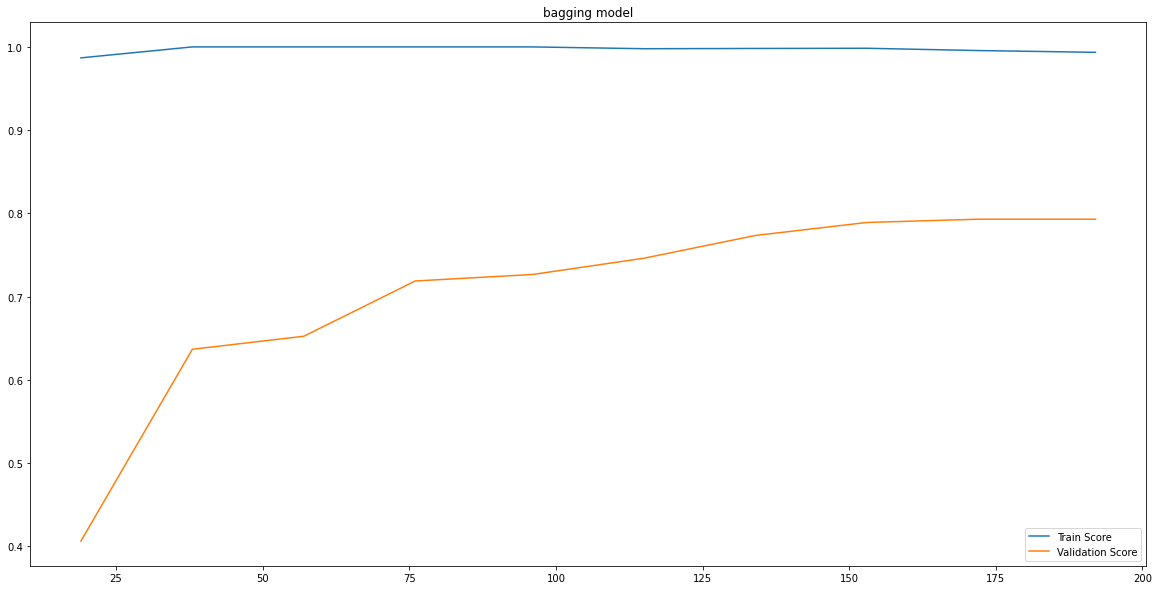

In [104]:
from sklearn.ensemble import BaggingClassifier

model_bagging = BaggingClassifier(base_estimator=model_svc, n_estimators=100, n_jobs=-1)

model = make_pipeline(preprocessor, model_bagging)
evaluation(model, 'bagging model')

## Tentative d'un modèle de Voting Simple

C:\Users\d9z\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\d9z\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\d9z\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\d9z\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\

              precision    recall  f1-score   support

           0       0.93      0.88      0.90        16
           1       0.76      0.76      0.76        17
           2       0.80      0.94      0.86        17
           3       0.83      0.71      0.77        14

    accuracy                           0.83        64
   macro avg       0.83      0.82      0.83        64
weighted avg       0.83      0.83      0.83        64



C:\Users\d9z\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\d9z\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\d9z\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[[14  0  0  2]
 [ 1 13  3  0]
 [ 0  1 16  0]
 [ 0  3  1 10]]
              precision    recall  f1-score   support

           0       0.93      0.88      0.90        16
           1       0.76      0.76      0.76        17
           2       0.80      0.94      0.86        17
           3       0.83      0.71      0.77        14

    accuracy                           0.83        64
   macro avg       0.83      0.82      0.83        64
weighted avg       0.83      0.83      0.83        64

Score -> 0.828125


C:\Users\d9z\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\d9z\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\d9z\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\d9z\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\d9z\anaconda3\lib\site-packages\xgboo

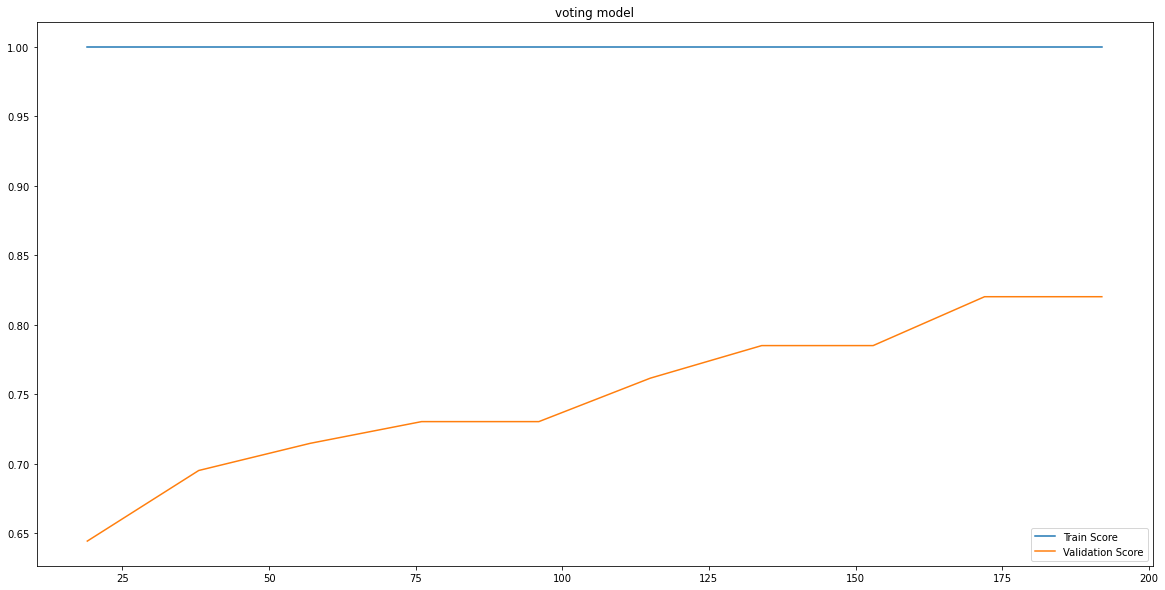

In [100]:
from sklearn.ensemble import VotingClassifier

model_voting = VotingClassifier([('LogisticRegressor', model_logistic),
                                    ('SVM', model_svc),
                                    ('RandomForest', model_random_forest),
                                    ('XGBoost', model_xgboost),
                                    ('lgbm', model_lgbm),
                                    ('gradient_boosting', model_gradient_boosting)],
                                    n_jobs=-1, voting='soft')#, final_estimator=model_random_forest)

model = make_pipeline(preprocessor, model_voting)
evaluation(model, 'voting model')